In [25]:
import numpy as np
import pandas as pd

data = pd.read_csv('boston.csv')
# CRIM - crime rate of the located place
# ZN - area > 25000 square inch ratio
# INDUS - non retail ratio
# CHAS - whether near river (1 near, 0 no)
# NOX - NO concentration
# RM - avg num of room
# AGE - built before 1940 ratio
# DIS - distance from CBD
# RAD - distance to the nearest road
# TAX - real estate tax
# PTRATIO - teacher student ratio
# B - 1000*(non-American ratio - 0.63) ** 2
# LSTAT - minority ratio
# MEDV - avg housing price

data = data.iloc[: , 1:]
# # check data info & non null
data.info()
data.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


False

In [32]:
class LinearRegression:
    def fit(self, X, y):
        X = np.asmatrix(X.copy()) # asmatrix() require X to be complete
        y = np.asmatrix(y).reshape(-1,1) # y is a vector, transform into a column (random row, 1 col)
        self.w_ = (X.T*X).I*X.T*y
    def predict(self, X):
        X = np.asmatrix(X.copy())
        result = X * self.w_
        return np.array(result).ravel() # flat the ndarray

In [46]:
# does not consider the intercept
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2)) # MSE
display(lr.w_) # slopes

17.011905533634074

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

In [47]:
# take into consider the intercept
t = data.sample(len(data), random_state=0)
new_col = t.columns.insert(0, 'intercept')
t = t.reindex(columns = new_col, fill_value=1)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))
display(lr.w_)

17.097531384669118

matrix([[ 4.00542166e+01],
        [-1.10490198e-01],
        [ 4.11074548e-02],
        [ 1.14986147e-02],
        [ 2.03209693e+00],
        [-1.95402764e+01],
        [ 3.28900304e+00],
        [ 6.91671720e-03],
        [-1.39738261e+00],
        [ 3.78327573e-01],
        [-1.54938397e-02],
        [-8.64470498e-01],
        [ 8.29999966e-03],
        [-5.66991979e-01]])

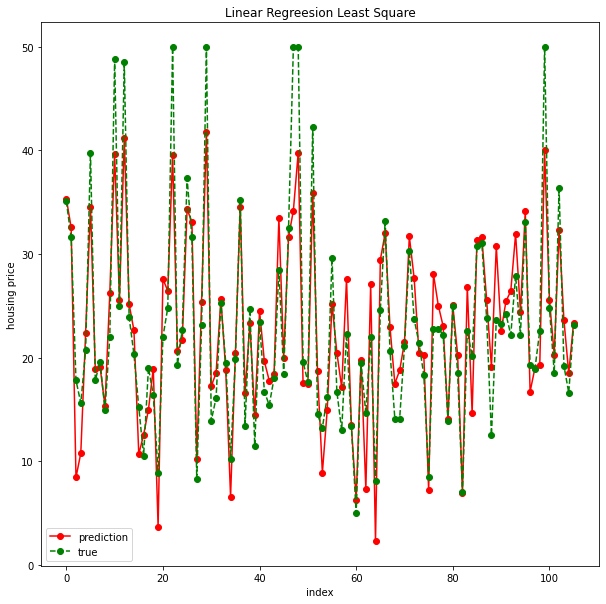

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(result, 'ro-', label='prediction')
plt.plot(test_y.values, 'go--', label='true')
plt.title('Linear Regreesion Least Square')
plt.xlabel('index')
plt.ylabel('housing price')
plt.legend()
plt.show()